In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls ../data2/

DK55_premotor_manual_2021-12-09.csv
DK55_premotor_manual_negative_round1_2021-12-09.csv
DK55_premotor_manual_positive_round1_2021-12-09.csv
DK55_premotor_sure_detection_2021-12-09.csv
DK55_premotor_unsure_detection_2021-12-09.csv


In [47]:
file={'manual_train':'../data2/DK55_premotor_manual_2021-12-09.csv',
      'manual_negative':'../data2/DK55_premotor_manual_negative_round1_2021-12-09.csv',
      'manual_negative':'../data2/DK55_premotor_manual_positive_round1_2021-12-09.csv',
      'computer_sure':'../data2/DK55_premotor_sure_detection_2021-12-09.csv',
      'computer_unsure':'../data2/DK55_premotor_unsure_detection_2021-12-09.csv'
     }
file

{'manual_train': '../data2/DK55_premotor_manual_2021-12-09.csv',
 'manual_negative': '../data2/DK55_premotor_manual_positive_round1_2021-12-09.csv',
 'computer_sure': '../data2/DK55_premotor_sure_detection_2021-12-09.csv',
 'computer_unsure': '../data2/DK55_premotor_unsure_detection_2021-12-09.csv'}

In [51]:
dfs={}
for name,path in file.items():
    dfs[name]= pd.read_csv(path,header=None)
    dfs[name]['name']=name

In [52]:
dfs.keys()

dict_keys(['manual_train', 'manual_negative', 'computer_sure', 'computer_unsure'])

In [66]:
All=pd.concat([dfs[key] for key in dfs])

In [100]:
All.shape,[(key,dfs[key].shape) for key in dfs]

((16449, 4),
 [('manual_train', (1912, 4)),
  ('manual_negative', (893, 4)),
  ('computer_sure', (12224, 4)),
  ('computer_unsure', (1420, 4))])

In [101]:
All.columns=['x','y','section','name']
All['x']=np.floor(All['x'])
All['y']=np.floor(All['y'])
All

,x,y,section,name
0,36418.0,19700.0,124000.0,manual_train
1,36386.0,19514.0,124000.0,manual_train
2,41504.0,14066.0,128000.0,manual_train
3,41209.0,14259.0,136000.0,manual_train
4,41190.0,14322.0,136000.0,manual_train
...,...,...,...,...
1415,37287.0,15250.0,436000.0,computer_unsure
1416,35427.0,15080.0,440000.0,computer_unsure
1417,35920.0,15224.0,440000.0,computer_unsure
1418,32396.0,16101.0,453000.0,computer_unsure


In [102]:
from scipy.spatial import distance_matrix

In [103]:
Distances=distance_matrix(np.array(All.iloc[:,:3]),np.array(All.iloc[:,:3]))

In [104]:
small_distances=Distances[Distances<100]
small_distances=small_distances[small_distances>0]
small_distances.shape

(9116,)

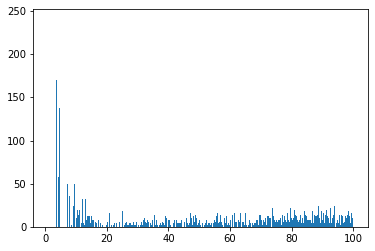

In [105]:
hist(small_distances,bins=1000);

In [106]:
very_small=Distances<40

In [107]:
pairs=np.transpose(np.nonzero(very_small))
pairs.shape

(21785, 2)

In [108]:
pairs=pairs[pairs[:,0]< pairs[:,1],:]
pairs.shape

(2668, 2)

In [138]:
All.shape

(16449, 4)

In [293]:
names=list(All.iloc[:,-1])

In [294]:
def append_all(A,B):
    for b in B:
        if not b in A:
            A.append(b)
    B=A
    return A,B

In [296]:
sets={} #an indexed set of hashes
for i in range(All.shape[0]):
    sets[i]=[i]
max_index=0
len(sets)

for i in range(pairs.shape[0]):
    first,second=pairs[i]
    #print('before',first,sets[first],second,sets[second],end='')
    sets[first],sets[second]=append_all(sets[first],sets[second])
    #print('after',first,sets[first],second,sets[second])
    if i%100==0:
        print('after',first,sets[first],second,sets[second])

after 0 [0, 2852] 2852 [0, 2852]
after 91 [91, 3217] 3217 [91, 3217]
after 182 [182, 15134] 15134 [182, 15134]
after 265 [265, 3650] 3650 [265, 3650]
after 353 [353, 3982] 3982 [353, 3982]
after 432 [432, 4357] 4357 [432, 4357]
after 530 [530, 4710] 4710 [530, 4710]
after 626 [626, 5149] 5149 [626, 5149]
after 718 [718, 5217] 5217 [718, 5217]
after 817 [817, 5602] 5602 [817, 5602]
after 915 [915, 2451, 15489] 15489 [915, 2451, 15489]
after 1015 [1015, 6072] 6072 [1015, 6072]
after 1117 [1117, 6648] 6648 [1117, 6648]
after 1215 [1215, 7086] 7086 [1215, 7086]
after 1306 [1306, 1307] 1307 [1306, 1307]
after 1395 [1395, 7541] 7541 [1395, 7541]
after 1494 [1494, 7965] 7965 [1494, 7965]
after 1595 [1595, 8414] 8414 [1595, 8414]
after 1693 [1693, 8737] 8737 [1693, 8737]
after 1797 [1797, 9260] 9260 [1797, 9260]
after 1891 [1891, 9565] 9565 [1891, 9565]
after 2018 [2018, 15165] 15165 [2018, 15165]
after 2166 [2166, 4189] 4189 [2166, 4189]
after 2325 [2325, 15376] 15376 [2325, 15376]
after 2486

In [297]:
#remove set duplicates

print('before removing duplicates',len(sets))
for i in range(len(sets)):
    if not i in sets:
        continue
    for j in sets[i]:
        if j != i and j in sets:
            del sets[j]
print('after removing duplicates',len(sets))

before removing duplicates 16449
after removing duplicates 13955


In [298]:
L=[]
for i in sets:
    L.append((i,len(sets[i])))

In [299]:
argmax([x[1] for x in L])

188

In [300]:
L[188]

(191, 7)

In [301]:
sets[191]

[191, 192, 193, 1979, 3378, 15133, 1978]

In [302]:
set_names={}
for i in sets:
    set_names[i]=[names[j] for j in sets[i]]
    

In [303]:
set_names[191]

['manual_train',
 'manual_train',
 'manual_train',
 'manual_negative',
 'computer_sure',
 'computer_unsure',
 'manual_negative']

 * 'Computer Detected, Human Missed': 24,
 * 'Human mind change': 108,
 * 'total train': 1850

In [305]:
#find sections used for training
sections=[]
for i in range(All.shape[0]):
    if All.iloc[i,3]=='manual_train':
        #print(int(All.iloc[i,2]))
        sections.append(int(All.iloc[i,2]))
sections=unique(sections)
sections

array([124, 128, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176,
       180, 184, 188, 192, 196, 200, 204, 208, 212, 216, 220, 224, 228,
       232, 236, 240, 244, 248, 252])

In [308]:
# total number of cells in training set
count=0
for i in sets:
        if 'manual_train' in set_names[i]:
            count+=1
train_sections['total train']=count
train_sections

{'Computer Detected, Human Missed': 24,
 'Human mind change': 108,
 'total train': 1850}

In [306]:
train_sections={}
## Cells that seem to be missed by human but detected confidently by computer
count=0
for i in sets:
    if int(All.iloc[i,2]) in sections:
        if set_names[i]==['computer_sure']:
            #print(sets[i],set_names[i])
            count+=1
train_sections['Computer Detected, Human Missed']=count
train_sections

{'Computer Detected, Human Missed': 24}

In [307]:
contra=[]
count=0
for i in sets:
    if int(All.iloc[i,2]) in sections:
        if 'manual_train' in set_names[i] and 'manual_negative' in set_names[i] and len(sets[i])==3:
            #print(sets[i],set_names[i])
            for j in sets[i]:
                #print(list(All.iloc[j,0:3]))
                contra.append(j)
            count+=1
train_sections['Human mind change']=count
train_sections

{'Computer Detected, Human Missed': 24, 'Human mind change': 108}

In [288]:
All['section']/=1000
All.iloc[contra,:]

,x,y,section,name
45,38376.0,17871.0,152.0,manual_train
12,38371.0,17866.0,152.0,manual_negative
53,38371.0,17866.0,152.0,computer_unsure
46,37793.0,18425.0,152.0,manual_train
14,37782.0,18424.0,152.0,manual_negative
...,...,...,...,...
888,41611.0,21563.0,248.0,manual_negative
836,41566.0,21582.0,248.0,computer_unsure
1892,41014.0,19928.0,248.0,manual_train
889,41011.0,19926.0,248.0,manual_negative


In [291]:
All.iloc[contra,:].to_csv('contradictions.csv')
!head contradictions.csv

,x,y,section,name
45,38376.0,17871.0,152.0,manual_train
12,38371.0,17866.0,152.0,manual_negative
53,38371.0,17866.0,152.0,computer_unsure
46,37793.0,18425.0,152.0,manual_train
14,37782.0,18424.0,152.0,manual_negative
56,37782.0,18424.0,152.0,computer_unsure
48,38235.0,17952.0,152.0,manual_train
15,38223.0,17966.0,152.0,manual_negative
54,38223.0,17966.0,152.0,computer_unsure


In [309]:
count=0
for i in sets:
    if  'manual_negative' in set_names[i] and not 'manual_train' in set_names[i]:
            #print(sets[i],set_names[i]) #,All.iloc[i,:])
            count+=1

In [310]:

count

694

In [268]:
count=0
for i in sets:
    if int(All.iloc[i,2]) in sections:
        if not 'manual_train' in set_names[i] and 'computer_sure' in set_names[i]:
            print(sets[i],set_names[i],All.iloc[i,:])
            count+=1

[3201] ['computer_sure'] x                37624.0
y                18082.0
section         160000.0
name       computer_sure
Name: 396, dtype: object
[4703] ['computer_sure'] x                39011.0
y                16500.0
section         180000.0
name       computer_sure
Name: 1898, dtype: object
[5146] ['computer_sure'] x                38875.0
y                16486.0
section         184000.0
name       computer_sure
Name: 2341, dtype: object
[5175] ['computer_sure'] x                40559.0
y                19878.0
section         184000.0
name       computer_sure
Name: 2370, dtype: object
[5180] ['computer_sure'] x                40504.0
y                19886.0
section         184000.0
name       computer_sure
Name: 2375, dtype: object
[6008] ['computer_sure'] x                37827.0
y                14251.0
section         192000.0
name       computer_sure
Name: 3203, dtype: object
[6012] ['computer_sure'] x                37432.0
y                14756.0
section         1920

In [269]:
## in manual sections: detected by computer_sure but not manually
count

24

In [275]:
count=0
for i in sets:
    if int(All.iloc[i,2]) in sections:
        if 'manual_negative' in set_names[i] and 'computer_sure' in set_names[i]:
        #and len(set_names[i])==2:
            print(sets[i],set_names[i],All.iloc[i,:])
            count+=1

[178, 1982, 3380] ['manual_train', 'manual_negative', 'computer_sure'] x               38381.0
y               17490.0
section        164000.0
name       manual_train
Name: 178, dtype: object
[179, 1983, 3379] ['manual_train', 'manual_negative', 'computer_sure'] x               38452.0
y               17476.0
section        164000.0
name       manual_train
Name: 179, dtype: object
[190, 1980, 3381] ['manual_train', 'manual_negative', 'computer_sure'] x               37610.0
y               17528.0
section        164000.0
name       manual_train
Name: 190, dtype: object
[191, 192, 193, 1979, 3378, 15133, 1978] ['manual_train', 'manual_train', 'manual_train', 'manual_negative', 'computer_sure', 'computer_unsure', 'manual_negative'] x               37682.0
y               17516.0
section        164000.0
name       manual_train
Name: 191, dtype: object
[279, 2034, 3651] ['manual_train', 'manual_negative', 'computer_sure'] x               38674.0
y               17869.0
section        16800

In [276]:
count

24